/home/andreasstillits/coding/Leaves1D/supplementary


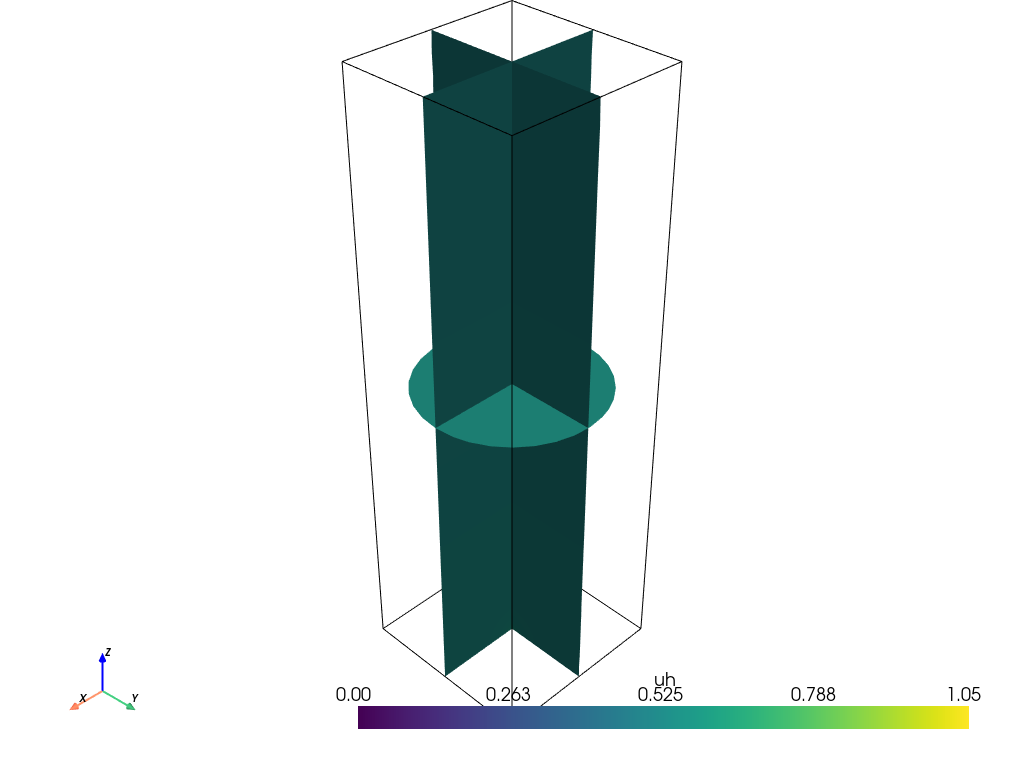

In [2]:
%cd /home/andreasstillits/coding/Leaves1D/supplementary

from codebase.utils import paths
import adios4dolfinx as a4x
from mpi4py import MPI
from dolfinx import fem 
import pyvista as pv 
from dolfinx.plot import vtk_mesh 
import numpy as np


def plot_3d_solution(filename: str) -> None:
    """Plot the 3D solution from file"""
    mesh = a4x.read_mesh(filename, MPI.COMM_SELF)
    V = fem.functionspace(mesh, ("Lagrange", 1))
    uh = fem.Function(V)
    a4x.read_function(filename, uh, name="solution")
    #
    topology, cell_types, geometry = vtk_mesh(mesh, mesh.topology.dim)
    grid = pv.UnstructuredGrid(topology, cell_types, geometry)
    grid.point_data["uh"] = uh.x.array.real
    xmin, xmax, ymin, ymax, zmin, zmax = grid.bounds
    slices = grid.slice_orthogonal(
        x=(xmin + xmax) / 2, y=(ymin + ymax) / 2, z=(zmin + zmax) / 2
    )
    p = pv.Plotter(notebook=True)
    p.add_mesh(slices, scalars="uh", cmap="viridis", clim=[0.0, 1.05])
    p.add_mesh(grid.outline(), color="k")
    p.show_axes()
    p.show()


filename = paths.get_base_path() / "lateral_scanning/typical/solutionB.bp"
plot_3d_solution(filename)